# Sprawozdanie Laboratoria 0-3
## Jan Bronicki 249011

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def saw_generator(z, x0, n):
    x = np.empty(n)
    x_next = x0
    for i in range(0, x.shape[0]):
        x[i] = x_next
        x_next = np.round(x_next * z, 7) - np.floor(x_next * z)
    return x

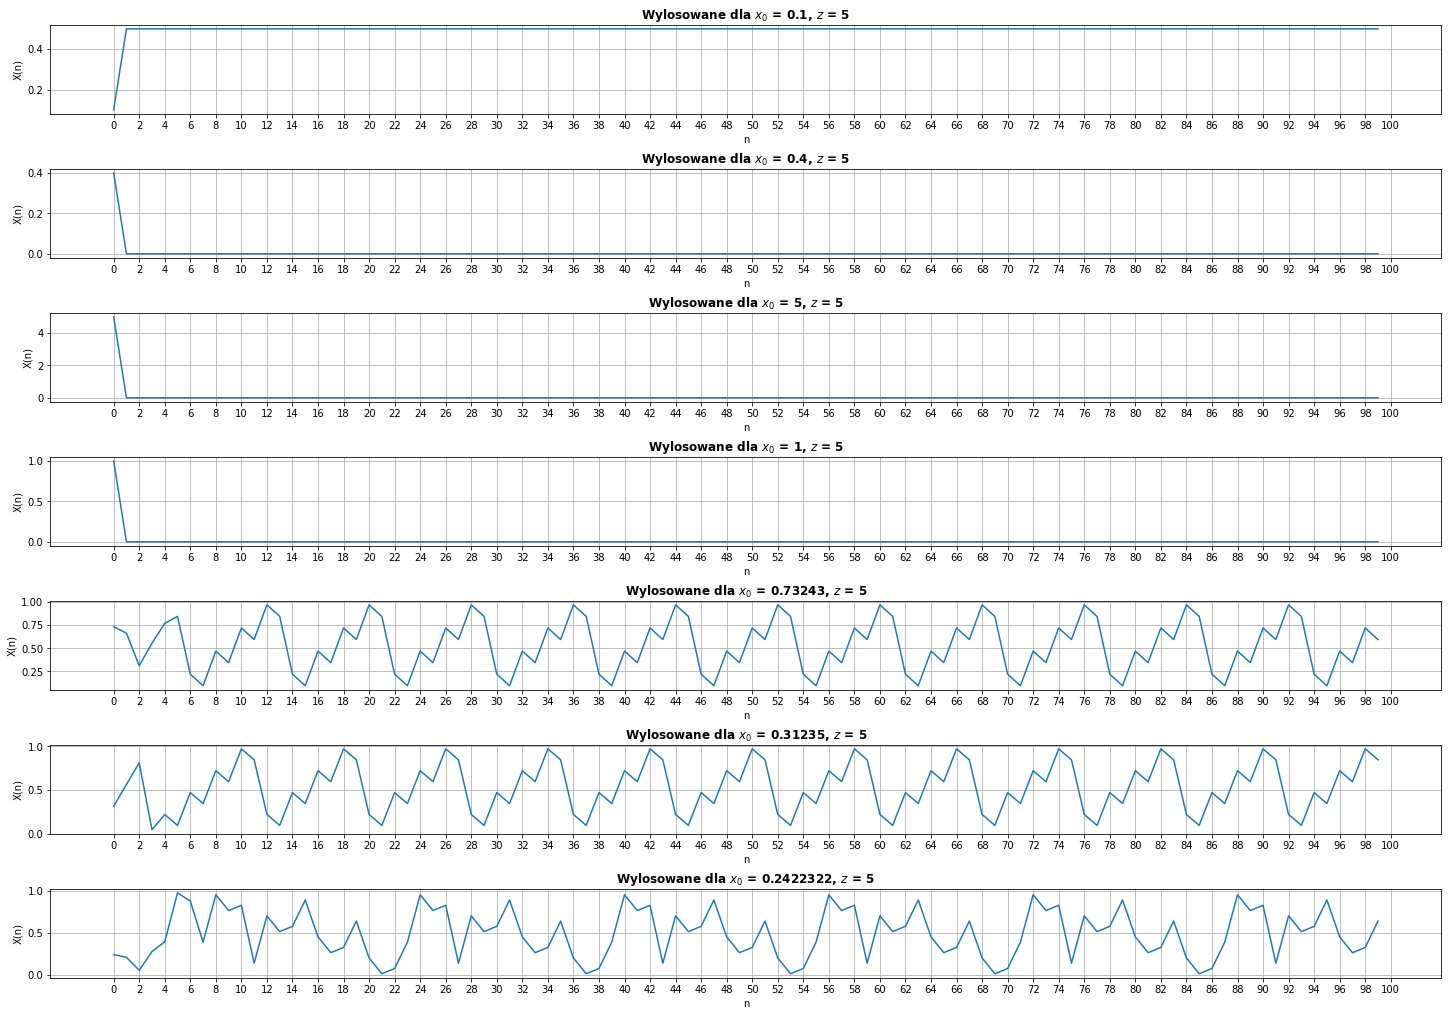

In [3]:
x0s = [0.1, 0.4, 5, 1, 0.73243, 0.31235, 0.2422322]
z = 5
fig, axs = plt.subplots(len(x0s), figsize=(20, len(x0s) * 2), constrained_layout=True)
for i in range(len(x0s)):
    x = saw_generator(z, x0s[i], 100)
    axs[i].plot(x, label=f"{i}")
    axs[i].set_title(f"Wylosowane dla $x_0$ = {x0s[i]}, $z$ = {z}", fontweight="bold")
    axs[i].set_xticks(np.arange(0, 101, 2))
    axs[i].set(xlabel="n", ylabel="X(n)")
    axs[i].grid(True)
plt.savefig(f"lab0a.png")
plt.show()


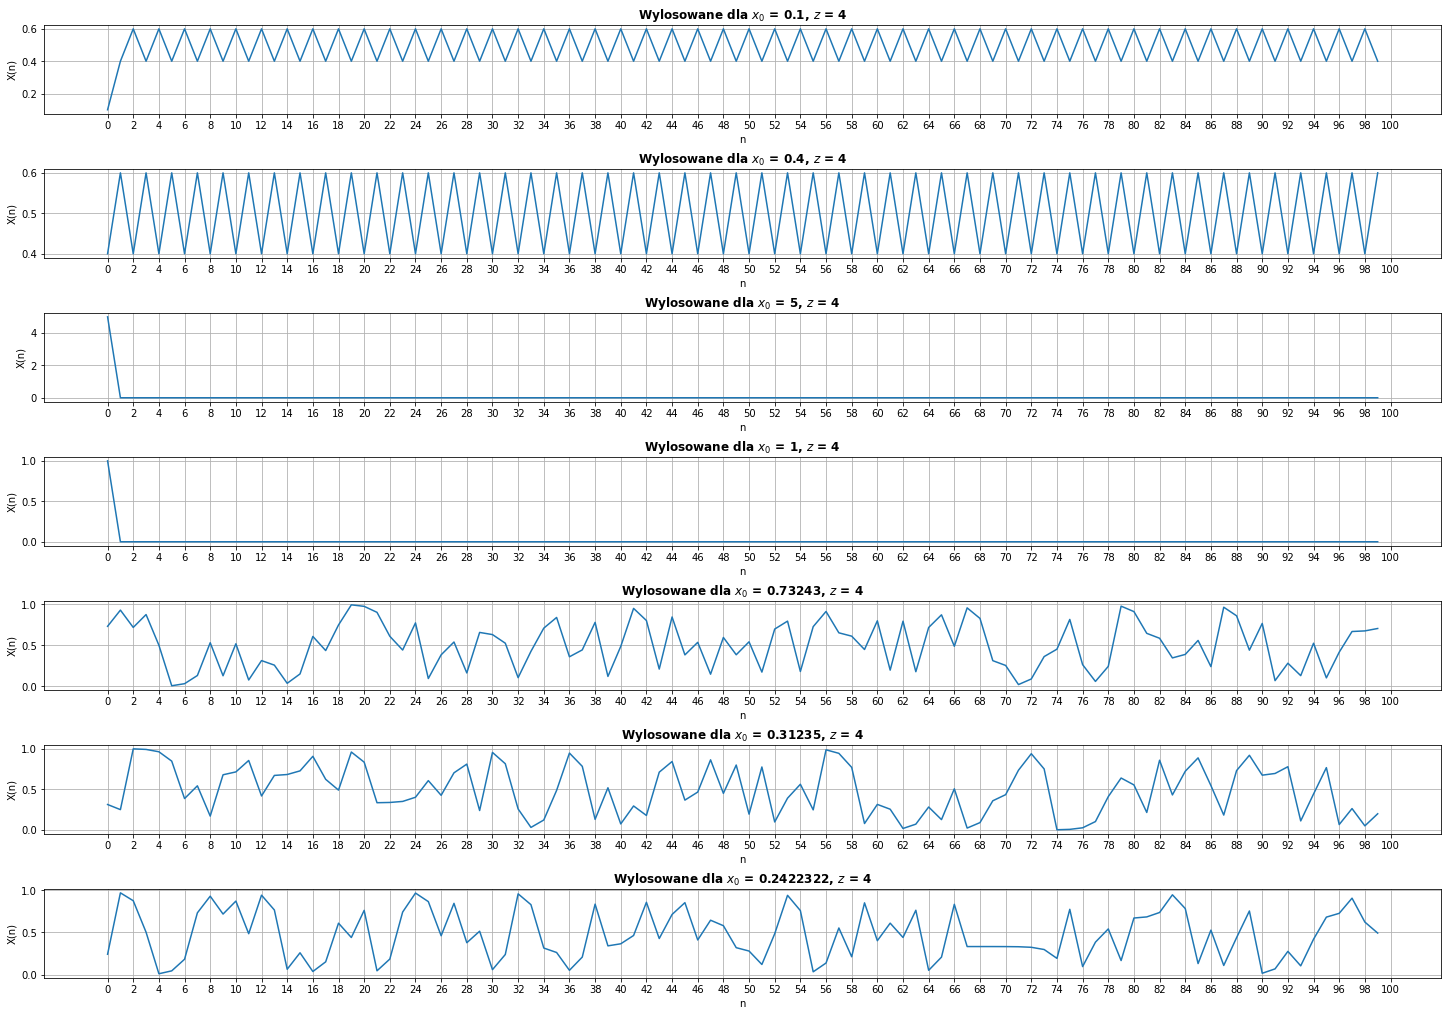

In [4]:
x0s = [0.1, 0.4, 5, 1, 0.73243, 0.31235, 0.2422322]
z = 4
fig, axs = plt.subplots(len(x0s), figsize=(20, len(x0s) * 2), constrained_layout=True)
for i in range(len(x0s)):
    x = saw_generator(z, x0s[i], 100)
    axs[i].plot(x, label=f"{i}")
    axs[i].set_title(f"Wylosowane dla $x_0$ = {x0s[i]}, $z$ = {z}", fontweight="bold")
    axs[i].set_xticks(np.arange(0, 101, 2))
    axs[i].set(xlabel="n", ylabel="X(n)")
    axs[i].grid(True)
plt.savefig(f"lab0b.png")
plt.show()


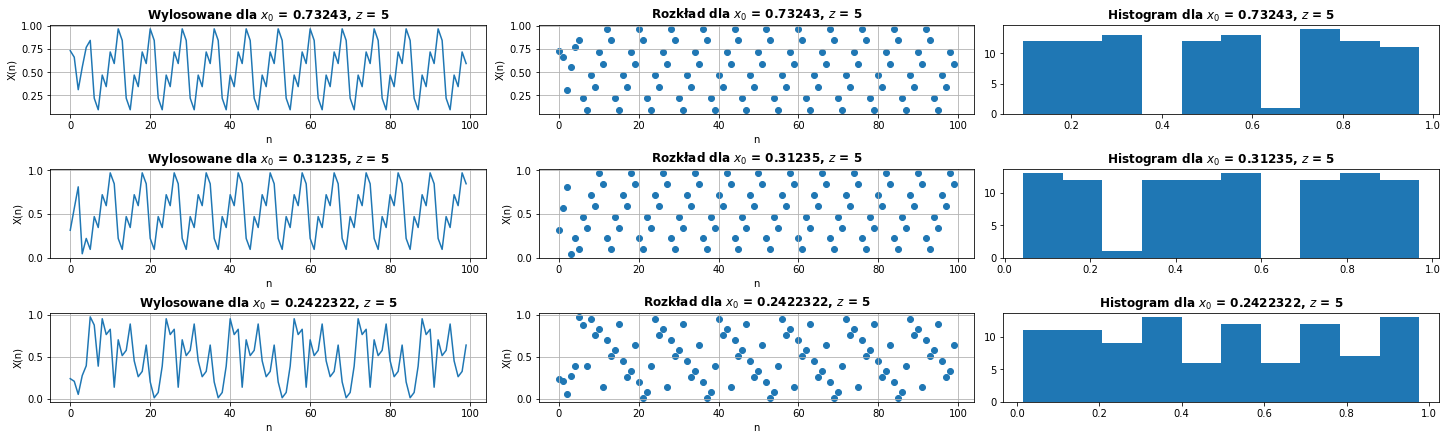

In [23]:
x0s = [0.73243, 0.31235, 0.2422322]
z = 5
n = 100
fig, axs = plt.subplots(
    len(x0s), 3, figsize=(20, len(x0s) * 2), constrained_layout=True
)
for i in range(len(x0s)):
    x = saw_generator(z, x0s[i], n)
    axs[i, 0].plot(x, label=f"{i}")
    axs[i, 0].set_title(
        f"Wylosowane dla $x_0$ = {x0s[i]}, $z$ = {z}", fontweight="bold"
    )
    axs[i, 0].set(xlabel="n", ylabel="X(n)")
    axs[i, 0].grid(True)

    axs[i, 1].scatter(list(range(n)),x)
    axs[i, 1].set_title(
        f"Rozkład dla $x_0$ = {x0s[i]}, $z$ = {z}", fontweight="bold"
    )
    axs[i, 1].set(xlabel="n", ylabel="X(n)")
    axs[i, 1].grid(True)

    axs[i, 2].hist(x)
    axs[i, 2].set_title(
        f"Histogram dla $x_0$ = {x0s[i]}, $z$ = {z}", fontweight="bold"
    )


plt.show()